<a href="https://colab.research.google.com/github/su92-msaiw-f25-016-spec/lessons-learned/blob/Machine_Learning_Project/Priceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**LOAD DATA**

In [112]:
data = pd.read_csv("price_classification_dataset.csv")

In [113]:
X = data[["price", "discount", "rating"]].values
y = data["label"].values

**RAW DATA VISUALIZATION**

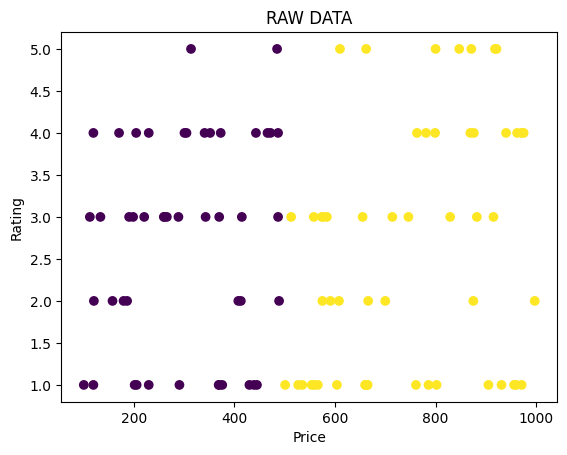

In [114]:
plt.figure()
plt.scatter(data["price"], data["rating"], c=data["label"])
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("RAW DATA")
plt.show()

In [115]:
# SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

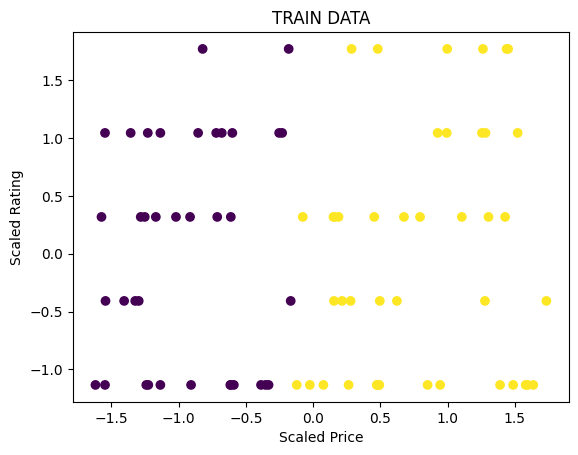

In [117]:
# TRAIN DATA VISUALIZATION
plt.figure()
plt.scatter(X_train[:,0], X_train[:,2], c=y_train)
plt.xlabel("Scaled Price")
plt.ylabel("Scaled Rating")
plt.title("TRAIN DATA")
plt.show()

In [118]:
# NUMPY To TENSOR
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [119]:
# MODEL
class PriceNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 8)
        self.fc2 = nn.Linear(8, 4)
        self.out = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.sigmoid(self.out(x))


In [120]:
model = PriceNN()

**LOSS**

In [121]:
criterion = nn.BCELoss()

In [122]:
# OPTIMIZER
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [124]:
# TRAINING
for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

In [128]:
# TEST + NEW DATA
with torch.no_grad():
    preds = model(X_test)
    preds = (preds > 0.5).float()

**FINAL TEST VISUALIZATION**

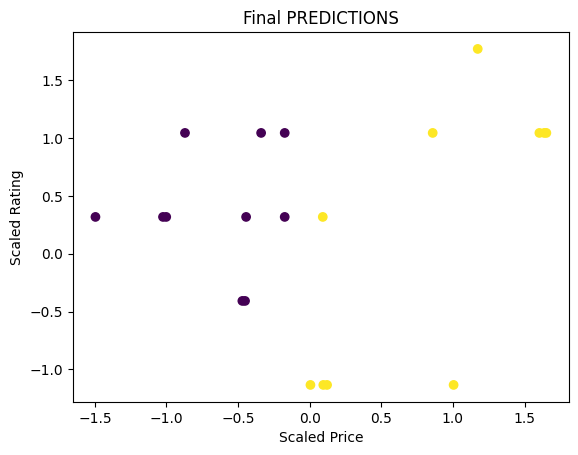

In [131]:
plt.figure()
plt.scatter(X_test[:,0], X_test[:,2], c=preds.squeeze())
plt.xlabel("Scaled Price")
plt.ylabel("Scaled Rating")
plt.title("Final PREDICTIONS")
plt.show()

**MODEL EVALUATION**

In [132]:
with torch.no_grad():
    test_output = model(X_test)
    test_loss = criterion(test_output, y_test)

    y_pred = (test_output > 0.5).float()

In [133]:
# Convert to numpy
y_pred_np = y_pred.numpy()
y_test_np = y_test.numpy()

In [135]:
print("Test Loss:", test_loss.item())

Test Loss: 0.00013898781617172062


In [139]:
accuracy = accuracy_score(y_test_np, y_pred_np)

In [140]:
print("Test Loss:", test_loss.item())
print("Test Accuracy:", accuracy)

Test Loss: 0.00013898781617172062
Test Accuracy: 1.0


In [143]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_np, y_pred_np))


Confusion Matrix:
[[10  0]
 [ 0 10]]


In [146]:
print("\nClassification Report:")
print(classification_report(y_test_np, y_pred_np))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [148]:
torch.save(model.state_dict(), "price_model.pth")
print("Model saved successfully")

Model saved successfully
